In [70]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
from langdetect import detect_langs #detect lang
from langdetect import detect #detect lang

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Pandas version 1.1.5
Matplotlib version 3.3.2


In [71]:
import glob

path = r'/home/anda/DL/ranalyzer/2021'
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, engine = 'python', index_col=None, header=0, encoding='utf-16')
    li.append(df)
# print(li)
    
raw_data = pd.concat(li, axis=0, ignore_index=True)
raw_data.info()

['/home/anda/DL/ranalyzer/2021/reviews_reviews_com.quipper.school.assignment_202108.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           425 non-null    object 
 1   App Version Code                       337 non-null    float64
 2   App Version Name                       337 non-null    object 
 3   Reviewer Language                      425 non-null    object 
 4   Device                                 425 non-null    object 
 5   Review Submit Date and Time            425 non-null    object 
 6   Review Submit Millis Since Epoch       425 non-null    int64  
 7   Review Last Update Date and Time       425 non-null    object 
 8   Review Last Update Millis Since Epoch  425 non-null    int64  
 9   Star Rating                            425 non-null 

<AxesSubplot:ylabel='Star Rating'>

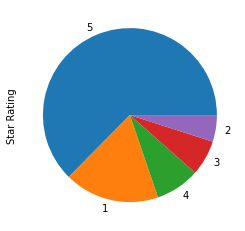

In [72]:
raw_data['Star Rating'].value_counts().plot(kind='pie')

In [73]:
is_bad_rating = raw_data['Star Rating'] <= 4
is_review_available = pd.notnull(raw_data['Review Text'])
is_no_review = pd.isnull(raw_data['Review Text'])

id_bad_ratting = raw_data['Reviewer Language'] == "id"
en_bad_ratting = raw_data['Reviewer Language'] == "en"

bad_ratting_no_review = raw_data[is_bad_rating & is_no_review]
bad_ratting_with_review = raw_data[is_bad_rating & is_review_available]

id_bad_ratting_no_review = raw_data[is_bad_rating & is_no_review & id_bad_ratting]
id_bad_ratting_with_review = raw_data[is_bad_rating & is_review_available & id_bad_ratting]

en_bad_ratting_no_review = raw_data[is_bad_rating & is_no_review & en_bad_ratting]
en_bad_ratting_with_review = raw_data[is_bad_rating & is_review_available & en_bad_ratting]

print("with review: ", len(bad_ratting_with_review), " vs no review: ", len(bad_ratting_no_review))
print("id with review: ", len(id_bad_ratting_with_review), " vs no review: ", len(id_bad_ratting_no_review))
print("en with review: ", len(en_bad_ratting_with_review), " vs no review: ", len(en_bad_ratting_no_review))

with review:  97  vs no review:  62
id with review:  71  vs no review:  47
en with review:  26  vs no review:  15


In [74]:
print("indonesia:")
id_bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']].tail(30)

indonesia:


,Star Rating,Review Text,App Version Name
298,2,"Ni knpa pas sy lg ngerjain soal keluar² mulu, ...",6.1.5
303,1,"Kenapa kalau masuk,keluar lagi hufftttt😑",6.1.5
305,1,Bug berhenti terus aplikasi nya. Tolong di per...,6.1.5
306,4,Keluar sendiri,NaN
307,1,Tolong ya admin sya mau belajar dan mengerjaka...,6.1.5
316,3,Apk nya bagus banget,NaN
318,2,"Keluar keluar sendiri dari aplikasi, ga jelas ...",6.1.5
327,1,Kok jadi keluar² semenjak udah update sebelum ...,6.1.5
328,1,Force close,6.1.5
329,1,"Kenapa setelah di update jadi ke gini ,suka ke...",6.1.5


In [75]:
print ("english:")
en_bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']].tail(30)

english:


,Star Rating,Review Text,App Version Name
2,4,how do I leave a class? I encoded some wrong c...,6.1.3
38,1,I am from the philippines and its all indonesian,6.1.3
116,1,I read every comments in this app but when I t...,NaN
137,1,Hakdog,6.1.0
143,2,I cant open those codes,NaN
168,4,"Best school platform, easy to use.",NaN
177,3,"I still have a lot of problems with this app ,...",6.1.3
179,4,Hard,NaN
197,1,I can't even join classes. Even though the cla...,6.1.3
204,1,That is a very important of our students,NaN


In [76]:
def check_review_text(text):
    if (isinstance(text, pd.Series)):
        return ' '.join(text)
    else:
         return text   

In [77]:
review_text =  bad_ratting_with_review['Review Text'] 
# print(check_review_text(review_text[163]))
# for review in review_text:
#     text = check_review_text(review)
#     print(text)
list_text = map(check_review_text, review_text)
print(len(list(list_text)), len(review_text))

97 97
